<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [29]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [31]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [32]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1 Become familiar with the dataset
#### Check the Data

In [34]:
#remove the unnamed column
if 'Unnamed: 0' in boston_df.columns:
    boston_df = boston_df.drop(columns=['Unnamed: 0'])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [35]:
print("First few rows of the dataset:")
display(boston_df.head())

First few rows of the dataset:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [36]:
print("\nDataset Information:")
boston_df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [37]:
print("\nSummary Statistics:")
display(boston_df.describe())


Summary Statistics:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Task 2 Generate Descriptive Statistics and Visualizations
#### Median value of owner-occupied homes boxplot

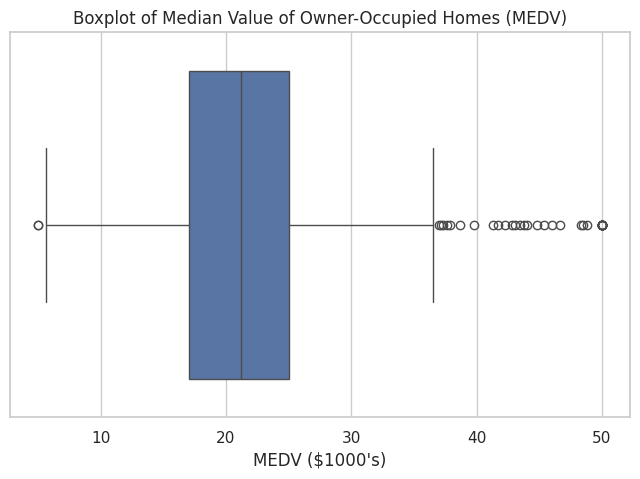

In [39]:
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# 1. Boxplot for "Median value of owner-occupied homes" (MEDV)
plt.figure(figsize=(8, 5))
sns.boxplot(x=boston_df['MEDV'])
plt.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
plt.xlabel("MEDV ($1000's)")
plt.show()

-----

#### Bar plot for the Charles river variable

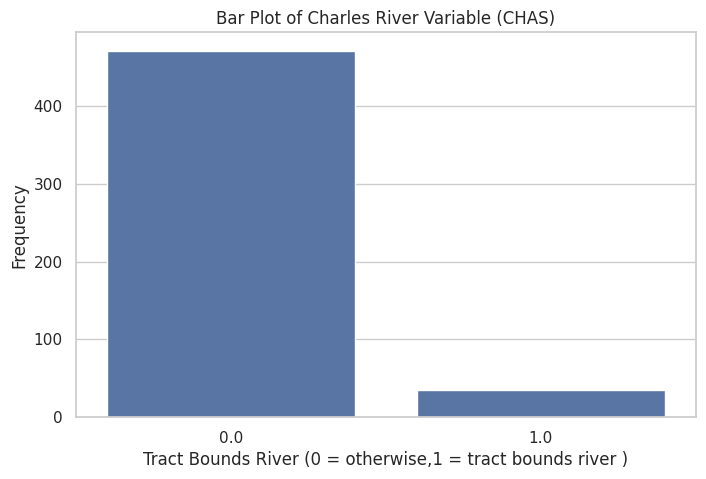

In [42]:
plt.figure(figsize=(8, 5))
sns.countplot(x='CHAS', data=boston_df)
plt.title("Bar Plot of Charles River Variable (CHAS)")
plt.xlabel("Tract Bounds River (0 = otherwise,1 = tract bounds river )")
plt.ylabel("Frequency")
plt.show()

-----

#### MEDV variable vs the AGE variable

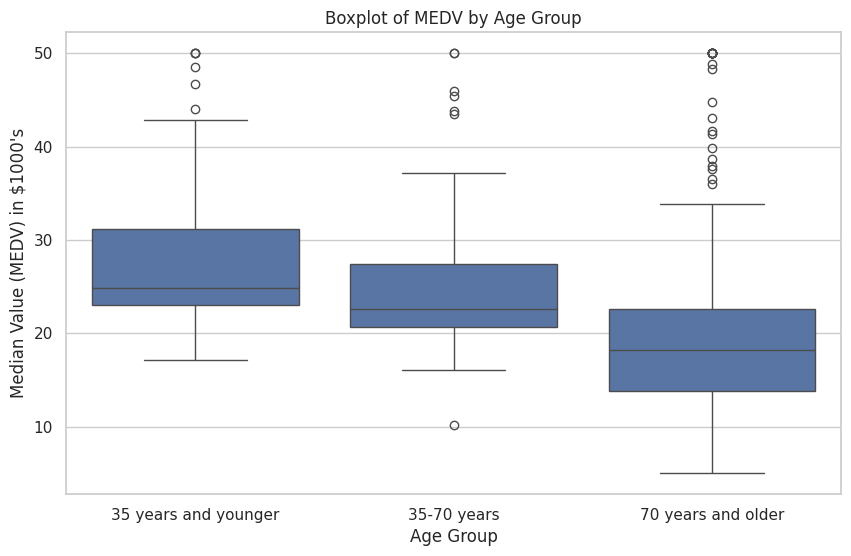

In [43]:
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=["35 years and younger", "35-70 years", "70 years and older"])

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title("Boxplot of MEDV by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Value (MEDV) in $1000's")
plt.show()

------


#### Scatter plot-relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town


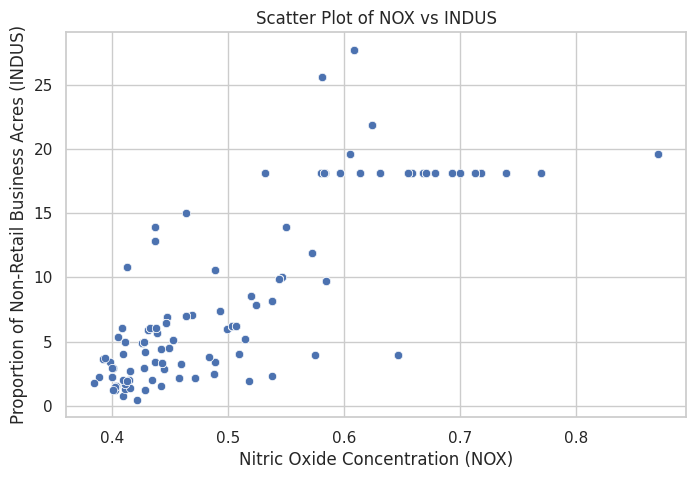

In [44]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title("Scatter Plot of NOX vs INDUS")
plt.xlabel("Nitric Oxide Concentration (NOX)")
plt.ylabel("Proportion of Non-Retail Business Acres (INDUS)")
plt.show()

#### It shows a direct、proportional relationship at low NOX. After NOX reach 0.6, most INDUS remains between 15 and 20.
-----


#### Histogram for the pupil to teacher ratio variable

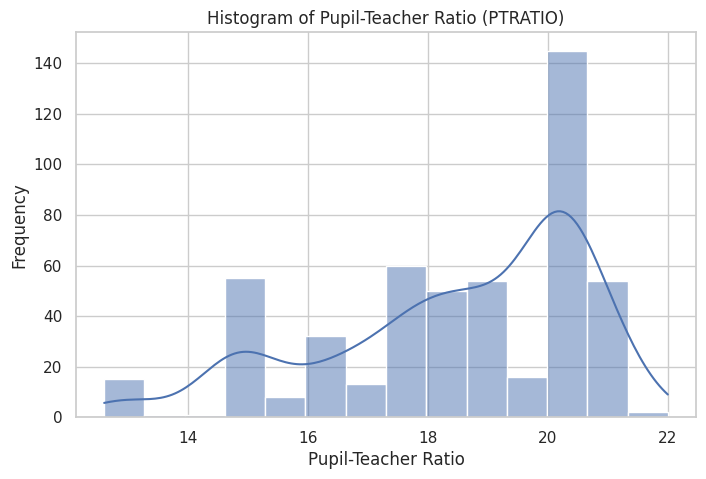

In [45]:
plt.figure(figsize=(8, 5))
sns.histplot(boston_df['PTRATIO'], kde=True)
plt.title("Histogram of Pupil-Teacher Ratio (PTRATIO)")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()


## Task 3: Use the appropriate tests to answer the questions provided.

#### Q1 : Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
Null Hypothesis(H0): NO significant difference in median value

Alternative Hypothesis(Ha): significant difference in median value

In [54]:
a = boston_df[boston_df["CHAS"] == 0]["MEDV"]
b = boston_df[boston_df["CHAS"] == 1]["MEDV"]
scipy.stats.ttest_ind(a,b,axis=0,equal_var=True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Since p-value less than alpha value of 0.05, we reject null hypothesis since there is statistical significant difference.

-----

#### Q2 : Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H0 : µ1=µ2=µ3(the three population means are equal)

Ha : At least one of the means differ

In [56]:
boston_df["AGE"].value_counts()
boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'
low = boston_df[boston_df["age_group"] == '35 years and younger']["MEDV"]
mid = boston_df[boston_df["age_group"] == 'between 35 and 70 years']["MEDV"]
high = boston_df[boston_df["age_group"] == '70 years and older']["MEDV"]
f_stats, p_value = scipy.stats.f_oneway(low,mid,high,axis=0)
print("F-Statistic={0}, P-value={1}".format(f_stats,p_value))

F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15



Since p-value is less than alpha value of 0.05, we reject null hypothesis since there is at least one of the means differ.

-----

#### Q3 : Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

 H0:NOX is not correlated with INDUS

 Ha:NOX is correlated with INDUS

In [57]:
pearson,p_value = scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])
print("Pearson Coefficient value={0}, P-value={1}".format(pearson,p_value))

Pearson Coefficient value=0.7636514469209192, P-value=7.913361061210442e-98



Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric Oxide and non-retail business acres per town.

-----

#### Q4 : What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

H0: weighted distances to five Boston employment centres are not related to median value

Ha: weighted distances to five Boston employment centres are related to median value

In [59]:
import numpy as np
y = boston_df['MEDV']
x = boston_df['DIS']
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
results.summary()
np.sqrt(0.062)

0.24899799195977465

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified
The square root of R-squared is 0.25, which implies weak correlation between both features